In [13]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [14]:
print(os.listdir("datasets"))

['test_images.npy', 'train_images.npy']


In [15]:
train_images = np.load('datasets/train_images.npy',encoding="latin1")

In [16]:
train_images.shape

(10000, 2)

In [21]:
image1 = (train_images[0][1]).reshape(100, 100)
plt.imshow(image1, cmap='gray')

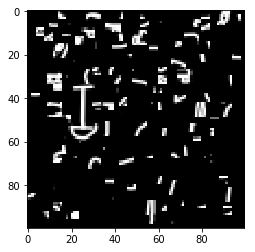

In [22]:
plt.show()